In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [18]:
df_temp = pd.read_csv('Hyderabad_Power_Train.csv')

my_list = df_temp['Temperature'].to_list()

for i in range(len(my_list)):
    if math.isnan(my_list[i]):
        my_list[i] = my_list[i-1]

df_temp['Temperature'] = my_list

my_list = df_temp['Humidity'].to_list()

for i in range(len(my_list)):
    if math.isnan(my_list[i]):
        my_list[i] = my_list[i-1]

df_temp['Humidity'] = my_list

my_list = df_temp['Wind Speed'].to_list()

for i in range(len(my_list)):
    if math.isnan(my_list[i]):
        my_list[i] = my_list[i-1]

df_temp['Wind Speed'] = my_list

my_list = df_temp['general diffuse flows'].to_list()

for i in range(len(my_list)):
    if math.isnan(my_list[i]):
        my_list[i] = my_list[i-1]

df_temp['general diffuse flows'] = my_list

my_list = df_temp['diffuse flows'].to_list()

for i in range(len(my_list)):
    if math.isnan(my_list[i]):
        my_list[i] = my_list[i-1] 

df_temp['diffuse flows'] = my_list

df_temp.to_csv('new_train.csv', header=True, index=False)

In [19]:
df = pd.read_csv('new_train.csv')
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.414,74.5,0.080,0.062,0.085,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.062,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.062,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
47591,2017-11-30 23:10:00,12.650,85.9,0.074,0.051,0.104,31347.69231,25705.78512,13301.20482
47592,2017-11-30 23:20:00,12.620,86.1,0.071,0.069,0.052,30603.07692,25088.42975,13081.44578
47593,2017-11-30 23:30:00,12.630,86.2,0.071,0.066,0.104,29889.23077,24571.48760,12740.24096
47594,2017-11-30 23:40:00,12.630,86.1,0.071,0.066,0.078,29249.23077,23942.97521,12480.00000


In [20]:
def hour(a):
    return float(a[11:13])

def month(a):
    return float(a[5:7])

df['hour']=df['DateTime'].apply(np.vectorize(hour))
df['month']=df['DateTime'].apply(np.vectorize(month))
df.head()



,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,hour,month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0.0,1.0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0.0,1.0
2,2017-01-01 00:20:00,6.414,74.5,0.080,0.062,0.085,29128.10127,19006.68693,19668.43373,0.0,1.0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.062,0.096,28228.86076,18361.09422,18899.27711,0.0,1.0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.062,0.085,27335.69620,17872.34043,18442.40964,0.0,1.0


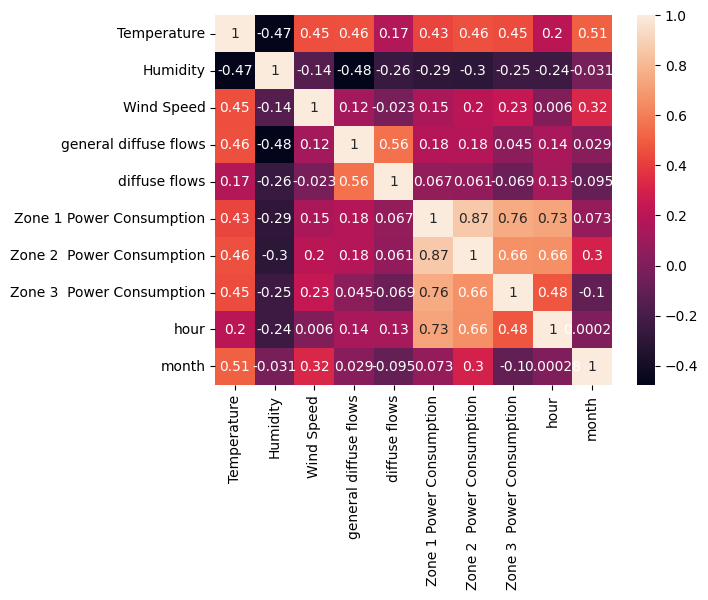

In [21]:
dataplot = sb.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
df = df.drop(['DateTime'], axis=1)
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,hour,month
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0.0,1.0
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0.0,1.0
2,6.414,74.5,0.080,0.062,0.085,29128.10127,19006.68693,19668.43373,0.0,1.0
3,6.121,75.0,0.083,0.062,0.096,28228.86076,18361.09422,18899.27711,0.0,1.0
4,5.921,75.7,0.081,0.062,0.085,27335.69620,17872.34043,18442.40964,0.0,1.0


In [23]:
y = df[['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']]
y

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,34055.69620,16128.87538,20240.96386
1,29814.68354,19375.07599,20131.08434
2,29128.10127,19006.68693,19668.43373
3,28228.86076,18361.09422,18899.27711
4,27335.69620,17872.34043,18442.40964
...,...,...,...
47591,31347.69231,25705.78512,13301.20482
47592,30603.07692,25088.42975,13081.44578
47593,29889.23077,24571.48760,12740.24096
47594,29249.23077,23942.97521,12480.00000


In [24]:
x = df[['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows','hour','month']]
x

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour,month
0,6.559,73.8,0.083,0.051,0.119,0.0,1.0
1,6.414,74.5,0.083,0.070,0.085,0.0,1.0
2,6.414,74.5,0.080,0.062,0.085,0.0,1.0
3,6.121,75.0,0.083,0.062,0.096,0.0,1.0
4,5.921,75.7,0.081,0.062,0.085,0.0,1.0
...,...,...,...,...,...,...,...
47591,12.650,85.9,0.074,0.051,0.104,23.0,11.0
47592,12.620,86.1,0.071,0.069,0.052,23.0,11.0
47593,12.630,86.2,0.071,0.066,0.104,23.0,11.0
47594,12.630,86.1,0.071,0.066,0.078,23.0,11.0


In [25]:
x_train,x_tst,y_train,y_st = train_test_split(x,y,test_size=0.3,random_state=0)
x_train

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour,month
11698,9.72,68.38,0.084,0.055,0.152,0.0,3.0
22672,19.85,73.40,0.083,0.044,0.096,3.0,6.0
25186,23.78,79.10,4.923,76.400,79.800,19.0,6.0
22735,25.80,56.91,0.073,791.000,216.100,14.0,6.0
38048,18.73,86.50,4.913,0.069,0.148,1.0,9.0
...,...,...,...,...,...,...,...
21243,18.96,84.60,4.924,0.080,0.119,2.0,5.0
45891,11.90,86.60,4.922,0.055,0.111,1.0,11.0
42613,17.62,69.21,0.085,0.048,0.104,3.0,10.0
43567,19.90,62.17,0.087,0.088,0.052,19.0,11.0


In [26]:
model = RandomForestRegressor(n_estimators=30,random_state=1,max_depth=None,min_samples_split=2,min_samples_leaf=1)

In [27]:
x_test= pd.read_csv('Hyderabad_Power_Test.csv')
x_test['hour']=x_test['DateTime'].apply(np.vectorize(hour))
x_test['month']=x_test['DateTime'].apply(np.vectorize(month))
pd.DataFrame(x_test['DateTime'], columns=['DateTime']).to_csv('prediction.csv',index=False)
pred_df=pd.read_csv('prediction.csv')
x_test = x_test.drop(['DateTime'], axis=1)
x_test

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour,month
0,19.070,55.77,0.086,0.048,0.100,0.0,12.0
1,18.990,56.70,0.080,0.066,0.093,0.0,12.0
2,18.880,58.11,0.078,0.070,0.104,0.0,12.0
3,18.780,58.98,0.080,0.040,0.100,0.0,12.0
4,18.770,59.98,0.078,0.044,0.093,0.0,12.0
...,...,...,...,...,...,...,...
4315,7.010,72.40,0.080,0.040,0.096,23.0,12.0
4316,6.947,72.60,0.082,0.051,0.093,23.0,12.0
4317,6.900,72.80,0.086,0.084,0.074,23.0,12.0
4318,6.758,73.00,0.080,0.066,0.089,23.0,12.0


In [28]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [29]:
nd=pd.DataFrame(y_pred, columns=['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption'])

In [30]:
pred_df.insert(1,'Zone 1 Power Consumption',nd['Zone 1 Power Consumption'])
pred_df.insert(2,'Zone 2  Power Consumption',nd['Zone 2  Power Consumption'])
pred_df.insert(3,'Zone 3  Power Consumption',nd['Zone 3  Power Consumption'])

In [31]:
pred_df.to_csv('prediction.csv',index=False)

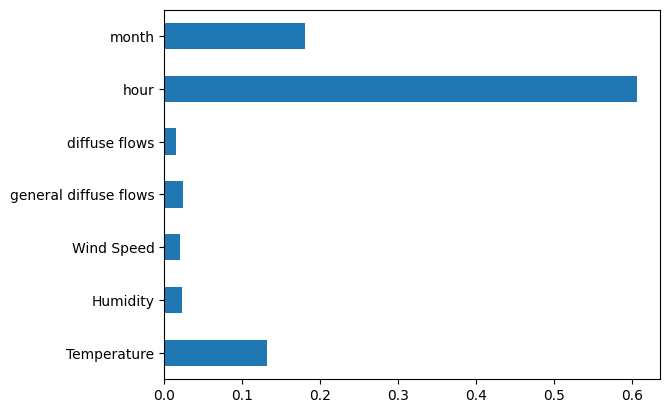

In [32]:
model_ranks = pd.Series(model.feature_importances_,index=x_train.columns,name="Importance")
ax = model_ranks.plot(kind='barh')